# Séance nº6 : intégration numérique (modèle PREM)

Intégration numérique de la masse de la Terre et du temps de trajet des ondes P avec le modèle PREM

 Le modèle ‘*Preliminary Reference Earth Model*’ (Dziewonski & Anderson, 1981) fournit des profils verticaux de vitesse des ondes P et de densité par intervalles de profondeur, pour un modèle de Terre axisymétrique (1D).

 On se propose d’utiliser ce modèle pour (1) calculer la masse de la Terre, (2) en déduire la valeur de la gravité g en surface, et (3) calculer le temps de trajet des ondes P qui traversent la Terre exactement par son centre.

## 1. Liens avec le cours

 \* Pourquoi la gravité à la surface de la Terre ne dépend que de la masse intérieure ? Comment varie-t’elle en fonction de l’altitude ?

Théorème de Gauss : « Le flux du vecteur g sortant d'une surface fermée est égal à la somme des masses intérieures à cette surface modulo -4.π.G »
Soit : $$\oint_s \vec{g};\vec{dS}=-4\pi G \iiint_v \rho dv=-4\pi G M$$ .
Au premier ordre, g est constante à la surface de la Terre (symétrie sphérique), et donc l’intégrale du flux est $g. S = g. 4π.Ra^2$, d’où $g = G.M/Ra^2$ (Ra rayon de la Terre). 

Même principe à une altitude h au dessus de la surface : $g.S = g. 4π.(Ra+h)^2$, soit $g = G.M/(Ra+h)^2$ .

 \* Exprimer le volume élémentaire dV en repère sphérique, en fonction de r, theta, phi. Exprimer la masse totale de la Terre (modèle axi-symétrique) en fonction de r et rho(r).
 

En repère sphérique : $dv = r^2.sin(\theta).dr.d\theta.d\Phi$

$$M=\iiint_{r,\theta, \Phi } r^2 sin(\theta)\rho(r).dr.d\theta. d\Phi =\int_{\Phi=0}^{2\pi} d\Phi.\int_{\theta=0}^\pi sin(\theta).d\theta.\int_{r=0}^{Ra}\rho(r).r^2.dr$$
$$M=4\pi.\int_{r=0}^{Ra} \rho(r).r^2.dr$$

## 2. Approche numérique

 \* Est-ce-que ces calculs sont possibles de façon analytique ? Quel(s) intérêt(s) à une approche numérique ?

Comme la densité et la vitesse sont des fonctions de z (ou r) seulement, et des fonctions simples (polynomes), il est possible de résoudre analytiquement l’intégrale ci-dessus. Mais c’est un travail long et fastidieux. De plus, si les fonctions sont mises à jour dans une nouvelle version (du modèle PREM, ici), il faudrait refaire tous les calculs.
L’approche numérique a le défaut de fournir une approximation de l’intégrale, mais de nombreux avantages : elle s’applique à toutes les fonctions, on peut facilement changer un paramètre (modification du modèle ; test de sensibilité). Le programme nécessaire est relativement court, et peut être appliqué à différents cas (c’est à dire qu’on peut facilement copier un programme déjà existant). Il existe aussi des fonctions qui réalisent (et optimisent) l’intégration.

 \* Quelles approximations doivent être faites avec l’approche numérique ?
 

Voir le schéma d’intégration (séance 5), on fait les approximations : (1) que les valeurs de la densité et de la vitesse sont constantes sur chaque intervalle dr ; (2) que chaque valeur est la moyenne des valeurs aux bornes de l’intervalle (ce qui revient à supposer une variation linéaire entre les bornes).

## 3. Ecrire des algorithmes et programmes pour résoudre les étapes suivantes :

1. lire les profils de vitesse et densité dans le fichier du modèle PREM ;

2. réaliser une boucle sur les profondeurs avec un nombre N d’intervalles ;

3. pour chaque intervalle de profondeur : calculer rho(z), dm(z), et le temps de trajet dt des ondes P ;

4. ajouter ces dm et dt pour calculer la masse de la Terre et le temps de trajet des ondes P ;

5. calculer g à la surface de la Terre : $g = G.M/R^2$ ($G = 6.67\times10^{-11}$ $N/m^2/kg^2$)

Propositions : essayer de procéder par étapes pour séparer les problèmes. Chaque étape doit être validée avant de passer à la suivante.

Etape 1 : on utilise des valeurs moyennes de Vp et rho dans les calculs

In [10]:
import numpy as np

# rayon terrestre en m
rt = 6371e3;

# initialisation masse m en kg, temps trajet en s
mt = 0;
tp = 0;

# nb de pas dr
N = 100000;

# resolution verticale dr en m
dr = rt/N; #taille du pas de rayon en m
Vp = 7000;   # m/s   
rho = 5000;  # kg/m3

# boucle en profondeur sur N
for ii in range(N):
   rr = ii*dr;   # rayon courant

# temps de parcours sur dr avec vp=7000m/s
   dt = dr/Vp; #dt temps pour que l'onde P parcours dr
   tp = tp + dt; #temps de propagation de l'onde P depuis le centre de la terre
 
# masse correspondant a dr avec rho=5000

   dm = 4* np.pi * rr*rr * rho * dr; #dm masse de la section de rayon dr
   mt = mt + dm; #masse de la terre

print('Masse de la Terre en kg : ', mt,'pour une densité moyenne de 5000 kg/m3')
print('Temps de trajet des ondes P en minutes : ', 2*tp/60, ' minutes pour une vitesse de propagation moyenne de 7000 m/s')
print('Acceleration de la pesanteur g en m/s^2: ', mt*6.67E-11 / rt/rt)


Masse de la Terre en kg :  5.41595334398083e+24 pour une densité moyenne de 5000 kg/m3
Temps de trajet des ondes P en minutes :  30.338095238074168  minutes pour une vitesse de propagation moyenne de 7000 m/s
Acceleration de la pesanteur g en m/s^2:  8.899908428446592


Etape 2 : créer les structures fonctions qui renvoient des valeurs constantes (moyennes) de Vp et rho, quelle que soit la profondeur z. On vérifie (important avant de passer à la suite) que l’on obtient les mêmes valeurs pour le temps de trajet et la masse totale que précédemment.

une fonction python est défini par : 
```python
def nom_fonction(liste de paramètres):
      #bloc d'instructions'
        
```

[lien fonction python](https://courspython.com/fonctions.html)

In [11]:
import numpy as np

# rayon terrestre en m
rt = 6371e3;

# initialisation masse m en kg, temps trajet en s
mt = 0;
tp = 0;

# nb de pas dr
N = 100000;

# resolution verticale dr en m
dr = rt/N;

# fonctions vp(z) et rho(z) renvoient valeurs moyennes. Bien que créer des fonctions est inutiles vu 
# qu'on utilise des constantes
def rho(z): #on défini une fonction rho dépend de z 
    r=5000
    return r


def Vp(z): #on défini une fonction Vp dépend de z 
    v = 7000;  # km/s
    return v

# boucle en profondeur sur N
for ii in range(N):
   rr = ii*dr;   # rayon courant

# temps de parcours sur dr avec vp=7000m/s
   dt = dr/Vp(rr);
   tp = tp + dt;
 
# masse correspondant a dr avec rho=5000

   dm = 4* np.pi * rr**2 * rho(rr) * dr;
   mt = mt + dm;

print('Masse de la Terre en kg : ', mt,'pour une densité moyenne de 5000 kg/m3')
print('Temps de trajet des ondes P en minutes : ', 2*tp/60, ' minutes pour une vitesse de propagation moyenne de 7000 m/s')
print('Acceleration de la pesanteur g en m/s^2: ', mt*6.67E-11 / rt**2)


Masse de la Terre en kg :  5.41595334398083e+24 pour une densité moyenne de 5000 kg/m3
Temps de trajet des ondes P en minutes :  30.338095238074168  minutes pour une vitesse de propagation moyenne de 7000 m/s
Acceleration de la pesanteur g en m/s^2:  8.899908428446592


Etape 3 : on prend en compte les données du modèle PREM pour calculer Vp et rho, mais pas encore de manière exacte (ceci afin de séparer la difficulté de choisir les coefficients correspondants à la profondeur correcte). On lit ces données dans le fichier PREM\_table1.txt, et on modifie les fonctions qui calculent Vp et rho de façon à utiliser le formalisme du modèle PREM (polynômes). On peut utiliser les valeurs du premier intervalle, et on doit obtenir des valeurs cohérentes pour le noyau de la Terre.

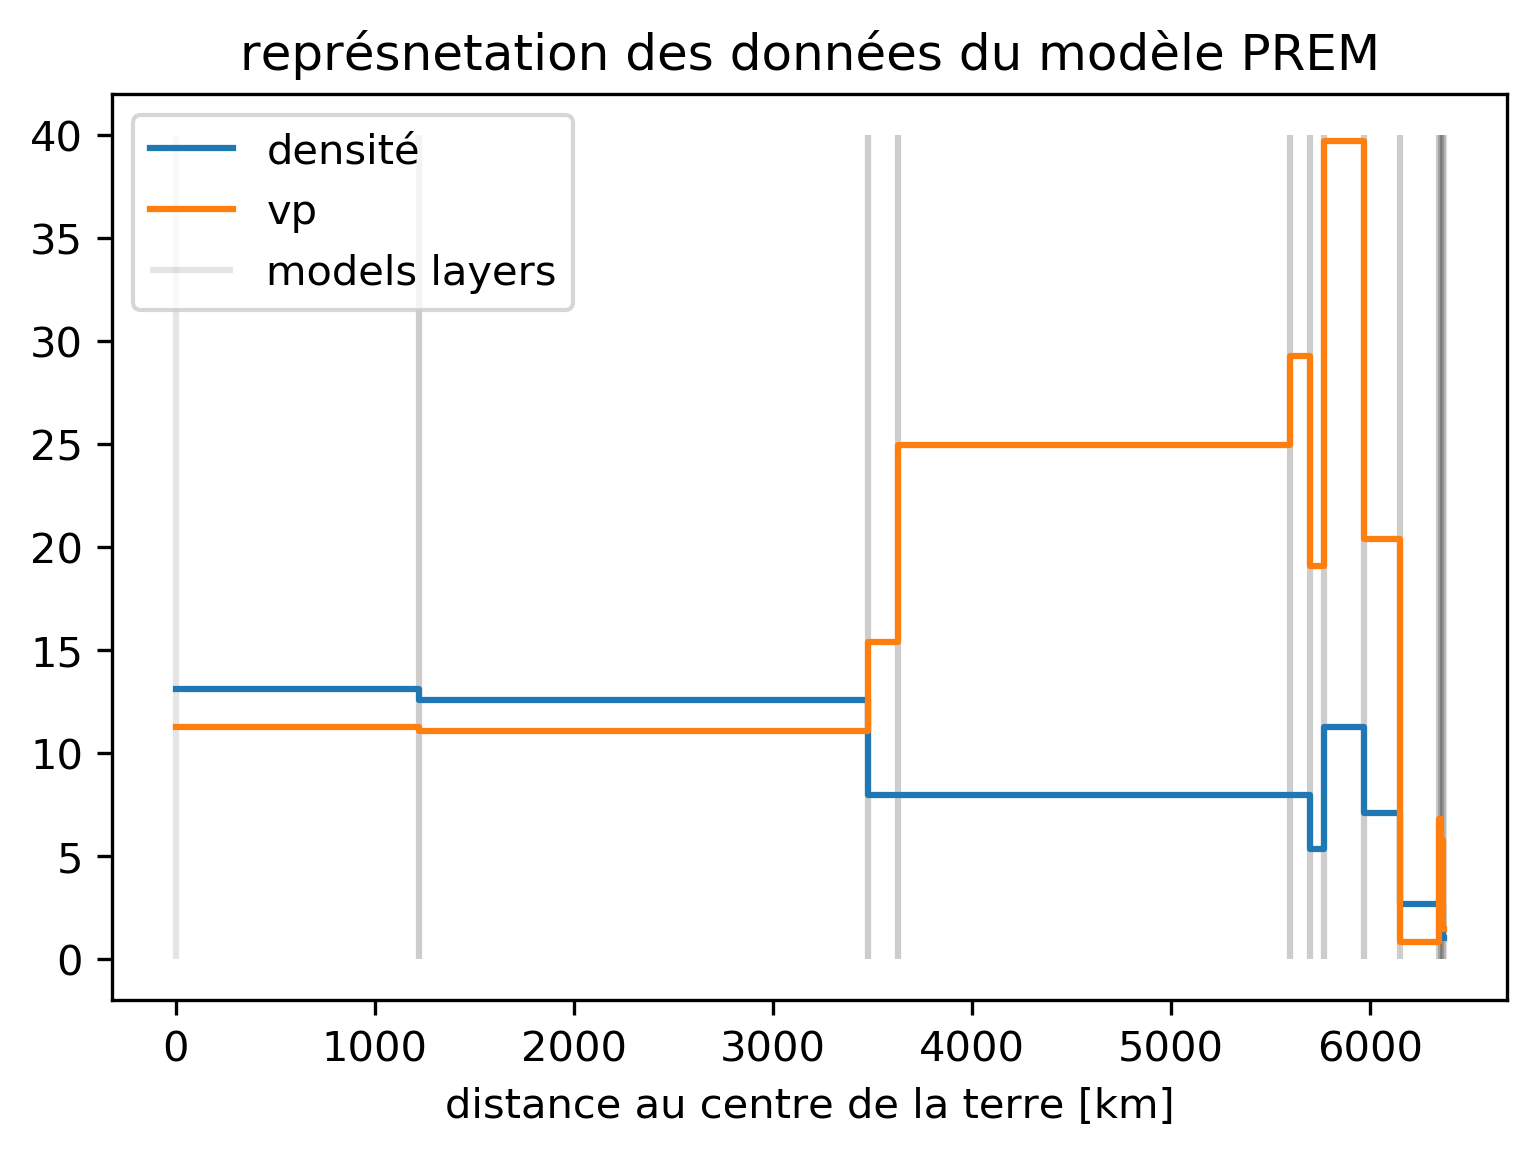

In [89]:
import numpy as np
import matplotlib.pyplot as plt

zzb,zzr,rho,vp=np.loadtxt('../TP6/PREM/PREM_table1.txt',skiprows=2,usecols=(0,1,2,6),unpack=True)*1e3;

#représentation des données du modèles. Figure un peu longue à faire pour son utilité.
zz=np.concatenate((zzb+0.1,zzr),axis=None)
rho_all=np.concatenate((rho,rho),axis=None)
vp_all=np.concatenate((vp,vp),axis=None)
rho_all=rho_all[np.argsort(zz)]
vp_all=vp_all[np.argsort(zz)]
zz=np.sort(zz)

plt.figure(1,dpi=300)
plt.plot(zz/1000,rho_all/1000,label='densité')
plt.plot(zz/1000,vp_all/1000,label='vp')
plt.vlines(zz/1000,0,40,alpha=0.1,label='models layers')
plt.legend()
plt.xlabel('distance au centre de la terre [km]')
plt.title('représnetation des données du modèle PREM')
plt.show()


masse terre en kg= 9.002244431857505e+24
temps de propagation= 11.05975955998161 minutes
gravité g en m/s2= 14.793176012689928


Text(0.5, 0, 'épaisseur (km)')

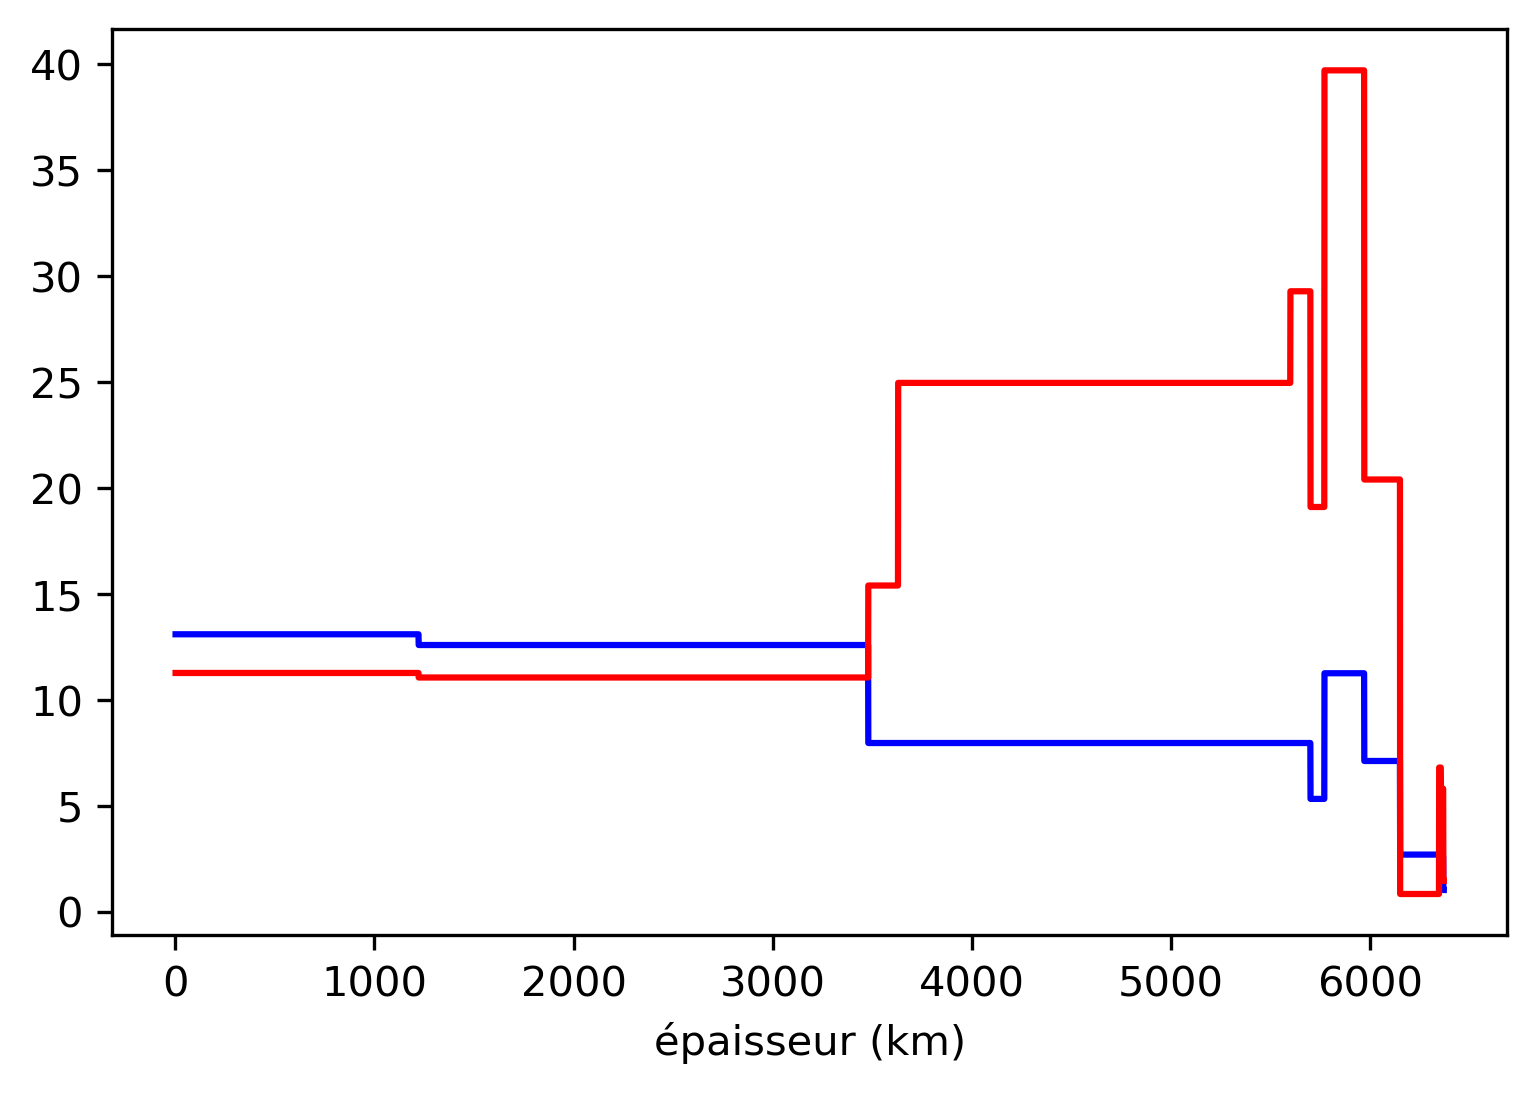

In [17]:

# rayon terrestre en m
rt = 6371e3;

# initialisation masse m en kg, temps trajet en s
mt = 0;
tp = 0;

#résolution verticale
dz=1e3 #m

# boucle verticale de dz a 6371km
# compteur ii pour conserver profil de d (et m, g)
rho_i=np.zeros(len(np.arange(dz,rt,dz)))
vp_i=np.zeros(len(np.arange(dz,rt,dz)))

ii=-1 #on défini un ii qui sera un compteur incrémenté de 1 à chaque boucle zz il vaudra 0 dès la première 
#et permettra de sauvegarder la valeur de rho et vp choisie pour chaque boucle zz.

for zz in np.arange(dz,rt,dz): # boucle de dz=1000m à rt=6371000m par un pas de 1000m
    #la boucle fera donc 6371 itérations
    ii+=1
    for nn in np.arange(0,len(zzb)): #boucle de la longueur d'un colonne donc nn ira de 0 à 11 
        #la boucle va permettre d'essayer chaque ligne du fichier dans la condition if
        if zz>=zzb[nn] and zz<zzr[nn]: # on cherche l'intervalle contenant zz
            rho_i[ii]=rho[nn] # on applique le rho moyen de l'intervale correspondant
            vp_i[ii]=vp[nn]
            
    dm = 4*np.pi*zz**2*rho_i[ii]*dz
    mt+=dm

    dt=dz/vp_i[ii]
    tp+=dt
    
print('masse terre=',mt)
print('temps de propagation=',tp/60,'minutes')

g= 6.67e-11*mt/rt**2

print('gravité g en m/s2=',g)

plt.figure(1,dpi=300)
plt.plot(np.arange(dz,rt,dz)/1e3,rho_i/1e3,'-b',label='masse volumique')
plt.plot(np.arange(dz,rt,dz)/1e3,vp_i/1e3,'-r',label='vitese onde p')
plt.xlabel('épaisseur (km)')


On obtient le même graphique que si on représente les données du modèles sur chaque intervalle ce qui est attendu la différence est le nombre de point de la courbe précédemment j'en avait 24, 2 borne par ligne. Sur cette figure j'en ai 6371 ce qui correspond au rayon de la terre avec un pas de 1000m. 


Etape 4 : on modifie les fonctions pour calculer les valeurs Vp et rho données par PREM (choix de l’intervalle de profondeur en fonction de z avec une boucle *while*). On doit obtenir les vraies valeurs pour le temps de trajet ($\approx 10$min depuis le centre) et la masse de la Terre ($~5.97\times 10^{24}$kg soit  $g\approx 9.81 m/s^2$).


Le fichier PREM_table1.txt contient les 10 colonnes suivantes :
intervalle défini par rayon min et max

4 coeff. de densité et 4 coeff. de vitesse qui permettent de former des polynômes de degré 3 du rayon normalisé x=r/ra qui permettent de calculer la masse volumique (rho en g/cm3) et la vitesse des ones P ($V_P$ en km/s)  

polynome de degré 3:   
	$rho = dens0 + dens1*x -dens2*x^2 + dens3*x^3 [g/cm3]$,  
	et $Vp = vp0 + vp1*x vp2*x^2 + vp3*x^3 [km/s]$.